# Question1

In [133]:
import numpy as np
from matplotlib import pyplot as plt

In [134]:
# Generate Data based on gamma
def generateData(gamma=0.1):
    D1 = np.random.normal(loc=0.0,scale=10.0,size=(10000,1))
    D2 = np.random.normal(loc=0.0,scale=10.0,size=(10000,1))
    X = np.concatenate((D1,D2),axis=1)
    slope = -2
    const = gamma

    X1 = np.array([[x1,x2] for [x1,x2] in X if slope*x1+const < x2])
    X1 = X1[0:500]
    X2 = np.array([[x1,x2] for [x1,x2] in X if slope*x1-const > x2])
    X2 = X2[0:500]

    X= np.concatenate((X1,X2),axis=0)
    X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
    Y= np.concatenate((np.ones(500),-1*np.ones(500)),axis=0)
    return X,Y


In [135]:
#generate datasets
X1,Y1 = generateData(0.25)
X2,Y2 = generateData(0.5)
X3,Y3 = generateData(1)
X4,Y4 = generateData(2)
X5,Y5 = generateData(4)

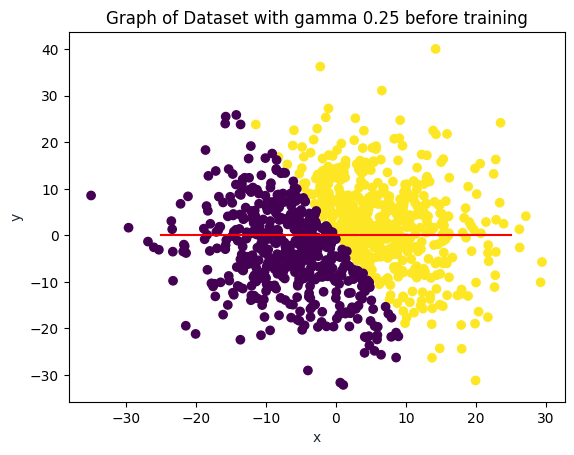

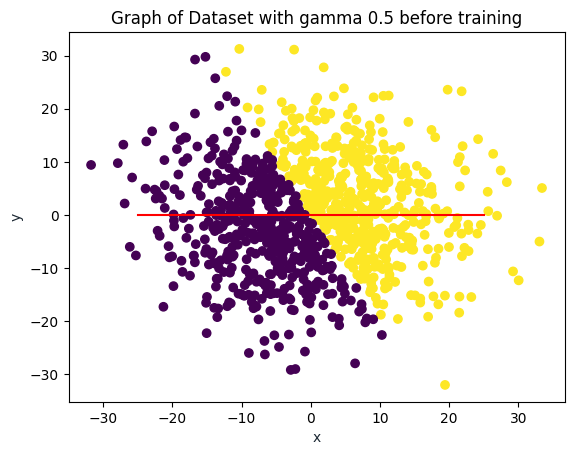

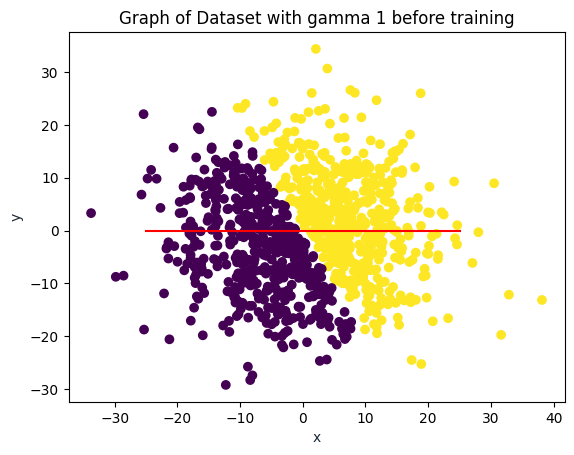

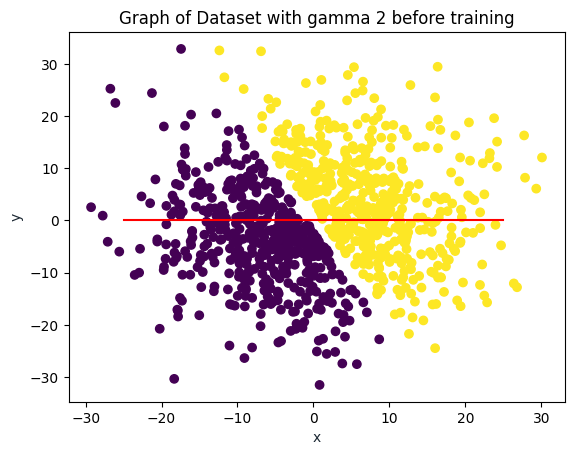

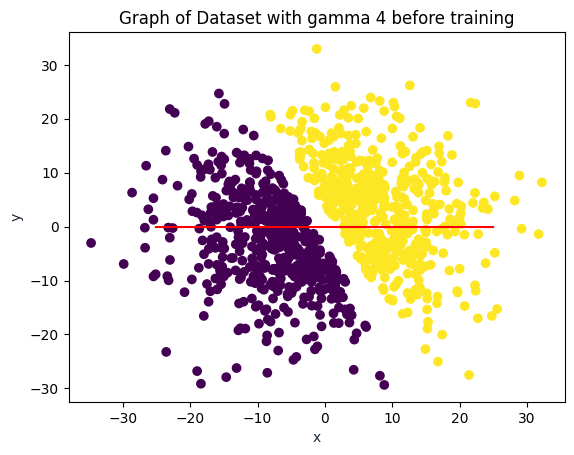

In [136]:
#plot the data using matplotlib scatter plot
def plotData(X,Y,gamma):
    x = np.linspace(-25,25,100)
    y = np.zeros(100,) 
    plt.title('Graph of Dataset with gamma {} before training'.format(gamma))
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.plot(x, y, '-r', label='W')
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
plotData(X1,Y1,0.25)
plotData(X2,Y2,0.5)
plotData(X3,Y3,1)
plotData(X4,Y4,2)
plotData(X5,Y5,4)

In [137]:
#The perceptron training algorithm

def train_perceptron(x, y, w, nb_epochs_max): 
  iter = 0 
  for e in range(nb_epochs_max):
    nb_changes = 0
    for i in range(x.shape[0]):
      if x[i].dot(w) * y[i] <= 0:
        iter = iter + 1
        w = w + y[i] * x[i]
        nb_changes = nb_changes + 1
    if nb_changes == 0:
        print('Early stopping at epoch number {} and number changes {}'.format(e,iter)) 
        break  
  return w
    

In [138]:
# Call the traning algorithm
W = np.ones((3,))
W1 = train_perceptron(X1,Y1, W, 10)
W2 = train_perceptron(X2,Y2, W, 10)
W3 = train_perceptron(X3,Y3, W, 10)
W4 = train_perceptron(X4,Y4, W, 10)
W5 = train_perceptron(X5,Y5, W, 10)

Early stopping at epoch number 1 and number changes 18
Early stopping at epoch number 3 and number changes 37
Early stopping at epoch number 2 and number changes 26
Early stopping at epoch number 1 and number changes 8
Early stopping at epoch number 1 and number changes 6


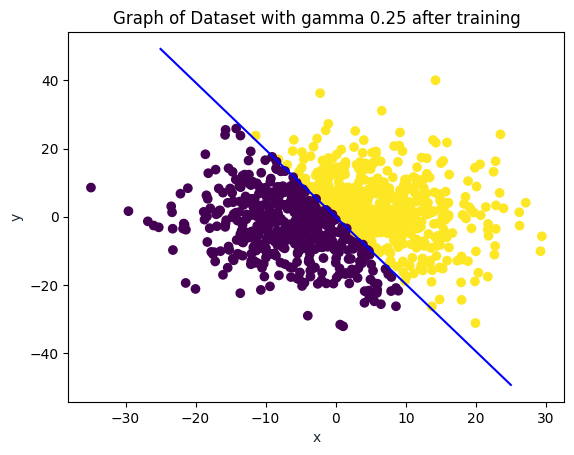

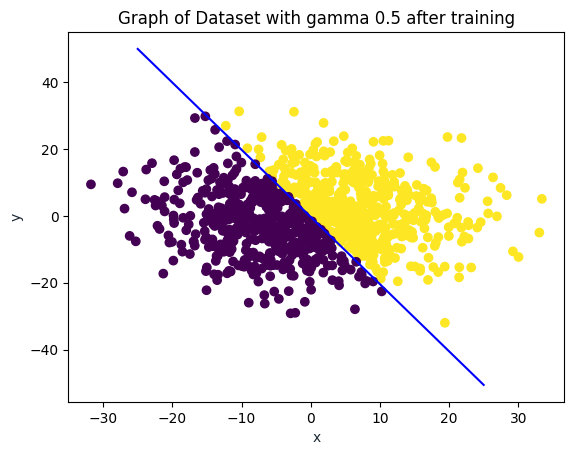

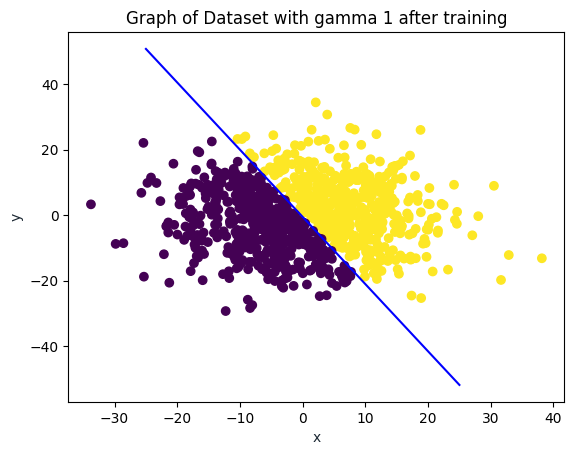

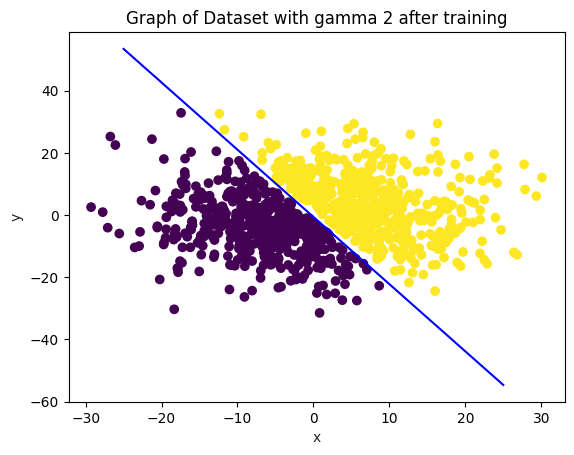

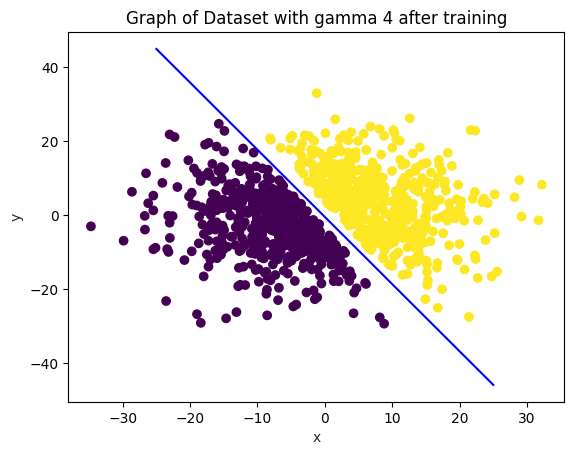

In [139]:
# Plot the data after training using matplotlib scatter plot
def plotDataAfterTraining(X,Y,W,gamma):
    x = np.linspace(-25,25,100) 
    plt.title('Graph of Dataset with gamma {} after training'.format(gamma))
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.plot(x, (-W[0]*x - W[2])/W[1], '-b', label='W')
    plt.show()
plotDataAfterTraining(X1,Y1,W1,0.25)
plotDataAfterTraining(X2,Y2,W2,0.5)
plotDataAfterTraining(X3,Y3,W3,1)
plotDataAfterTraining(X4,Y4,W4,2)
plotDataAfterTraining(X5,Y5,W5,4)

## Analysis
From the above we can say that no of epochs or iterations(k) seems to decrease with increase in gamma (level of separatablility of data).It may be because as the level of separability increases space of lines which can seperate them also increases.So the chance of reaching the separating line increases for each iterating which in turn decreases level the total no of epochs or iterations(k).

# Question2

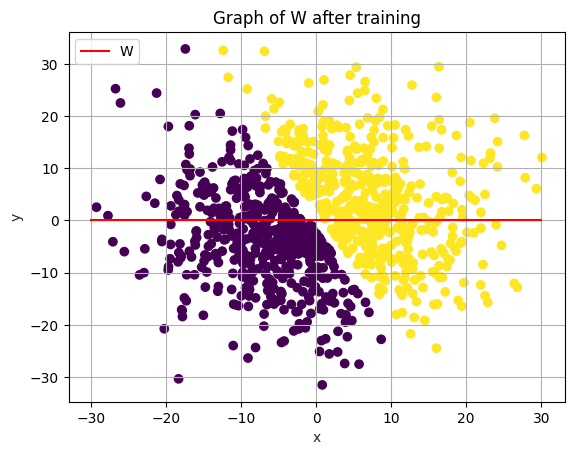

In [140]:
# Plot the data and W after training

x = np.linspace(-30,30,100)
y = np.zeros(100,)
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(X4[:,0], X4[:,1],c=Y1)
plt.grid()
plt.show()

In [141]:
#loss functions and gradient

# implementing absolute loss and gradient for all the data points
def loss(y_true,y_predicted):
    return np.mean(abs(y_true-y_predicted))
# implement
def gradient(X,y,w):
    grad = np.zeros(X.shape[1])
    for i in range(X.shape[0]):
        grad += np.sign((np.dot(X[i,:],w)-y[i]))*X[i,:]
    return grad


In [142]:
# gradient descent
def gradient_descent(X,Y,w,learning_rate=0.1,max_iterations=100,threshold=1e-6):
    for i in range(max_iterations):
        #check exit conditions
        if loss(Y,X.dot(w)) <= threshold:
            break
        #update w
        w -= learning_rate*gradient(X,Y,w)
    return w

In [143]:
W = np.random.rand(3)
W = gradient_descent(X4,Y4,W)
print(W)

[-102.33952799  -54.82276881   -3.20512269]


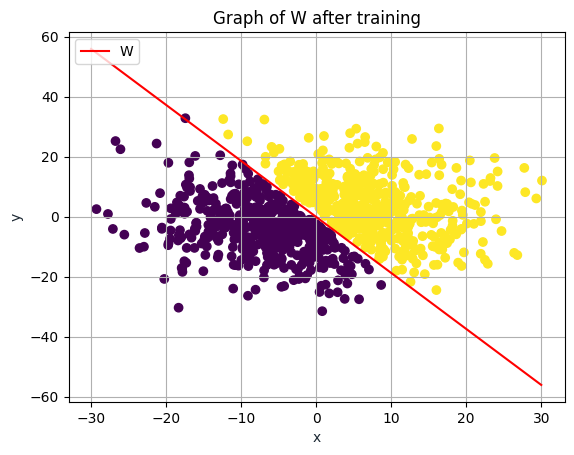

In [144]:
# Plot the data and W after training

x = np.linspace(-30,30,1000)
y = -(W[0]/W[1])*x - (W[2]/W[1])
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(X4[:,0], X4[:,1],c=Y1)
plt.grid()
plt.show()

# Question3

In [145]:
#data generation for non linearly separable data

#data generation for two concentric circles
Angle1 = np.random.uniform(low=0,high=6.28,size=(500,1))
Angle2 = np.random.uniform(low=0,high=6.28,size=(500,1))
r_in = 2
r_out = 4
R_in = np.random.uniform(low=0,high=6.28,)
X11 = np.concatenate((r_in*np.sin(Angle1),r_in*np.cos(Angle1)),axis=1) # r_in
X22 = np.concatenate((r_out*np.sin(Angle2),r_out*np.cos(Angle2)),axis=1) # r_in
X = np.concatenate((X11,X22),axis=0)
X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
Y = np.concatenate((np.ones(500),-1*np.ones(500)),axis=0)

#data generation for xor datasets

# X1 = np.random.uniform(low=4,high=10,size=(250,1))
# X1 = np.concatenate((X1,-X1,-X1,X1),axis=0)
# X2 = np.random.uniform(low=4,high=10,size=(250,1))
# X2 = np.concatenate((X2,-X2,X2,-X2),axis=0)
# X = np.concatenate((X1,X2),axis=1)
# Y = np.concatenate((np.ones((500,1)),-np.ones((500,1))),axis=0)


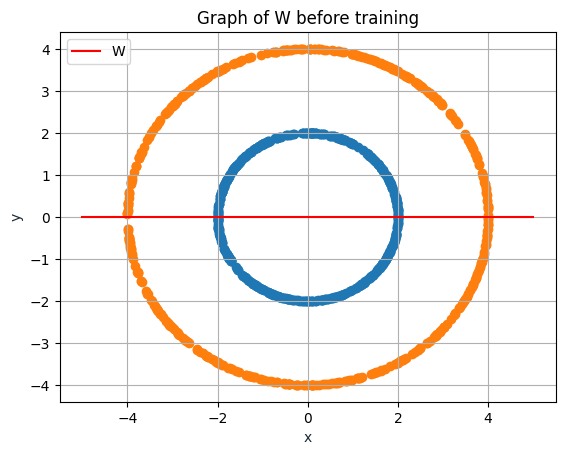

In [146]:
# plot the data and W before training

x = np.linspace(-5,5,100)
y = np.zeros(100,) 
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(X[:,0][:500], X[:,1][:500])
plt.scatter(X[:,0][500:], X[:,1][500:])
plt.grid()
plt.show()
# X = [[1,1,1],[-1,-1,1],[1,-1,1],[-1,1,1]]
# Y = [[1],[1],[-1],[-1]]
# X = np.array(X)
# Y = np.array(Y)

In [147]:
#defining the MLP's layers and weights
layers = [2,6,1]
W1 = 2*np.random.rand(layers[0]+1,layers[1]+1)-1
W2 = 2*np.random.rand(layers[1]+1,layers[2])-1


In [148]:
import numpy as np

def predict(X,W1,W2):
    # Forward Propagation
    S1 = np.dot(X,W1)
    X1 = relu(S1)
    S2 = np.dot(X1,W2)
    X2 = S2
    return np.sign(X2[0])

def relu(x):
    return np.maximum(0,x)

def absolute_loss(y_pred,y_true):
    return np.abs(y_pred-y_true)


def total_loss(DX,Dy,W1,W2):
    l=0
    for i in range(DX.shape[0]):
        X = DX[i]
        y = Dy[i]
        l += absolute_loss(predict(X,W1,W2),y)
    return l/DX.shape[0]

def accuracy(DX,Dy,W1,W2):
    correct =0
    for i in range(DX.shape[0]):
        X = DX[i]
        y = Dy[i]
        correct += (predict(X,W1,W2) == y)
    return correct/DX.shape[0] 

def backpropagation(X,y,W1,W2,lr):
    # Forward Propagation
    S1 = np.dot(X,W1)
    X1 = relu(S1)
    S2 = np.dot(X1,W2)
    X2 = S2
    
    # Loss calculation
    # loss = np.mean(absolute_loss(X2,y))
    
    # Backpropagation
    dX2 = np.sign(X2-y)
    dS2 = dX2
    dW2 = np.dot(X1.reshape(-1,1),dS2.reshape(-1,1))
    dX1 = np.dot(dS2,W2.T)
    dS1 = np.multiply(dX1,np.where(X1>0,1,0))
    dW1 = np.dot(X.reshape(-1,1),dS1.reshape(-1,1).T)
    # print(dX2.shape,dS2.shape,dW2.shape,dX1.shape,dS1.shape,dW1.shape)
    # print(total_loss(X,y,W1,W2))
    # # Update weights
    # W1 = W1 - lr*dW1
    # W2 = W2 - lr*dW2
    
    return dW1,dW2

def training(DX,Dy,W1,W2,lr,epochs=100):
    #no of epochs
    for i in range(epochs):
        # ldW1 = []
        # ldW2 = []
        # for j in range(DX.shape[0]):
        #     X = DX[j]
        #     y = Dy[j]

        #     #back propagation
        #     dW1,dW2 = backpropagation(X,y,W1,W2,lr)
        #     ldW1.append(dW1)
        #     ldW2.append(dW2)
        # W1 -= np.mean(np.array(ldW1))
        # W2 -= np.mean(np.array(ldW2))
        j = np.random.randint(DX.shape[0])
        X = DX[j]
        y = Dy[j]
        dW1,dW2 = backpropagation(X,y,W1,W2,lr)
        total_loss(DX,Dy,W1,W2)
        W1 -= lr*dW1
        W2 -= lr*dW2


In [149]:
training(X,Y,W1,W2,0.01,1000)
# total_loss(X,Y,W1,W2)
#checking overfitting
print(accuracy(X,Y,W1,W2))

0.968
